Libraries and data input

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import os
#%matplotlib inline

matches = pd.read_csv('data/Matches.csv')
players = pd.read_csv('data/Players.csv')
teams_stats = pd.read_csv('data/General Stats.csv')

#Clean team names of any latin space
matches['HomeTeamName'] = matches['HomeTeamName'].apply(lambda x: x.replace(u'\xa0', u'')).apply(lambda x : x.strip())
matches['AwayTeamName'] = matches['AwayTeamName'].apply(lambda x: x.replace(u'\xa0', u'')).apply(lambda x : x.strip())    

#Replace names Soviet Union & West Germany 
matches.replace('Soviet Union', 'Russia', inplace = True)
matches.replace('West Germany', 'Germany', inplace = True)
players.replace('Soviet Union', 'Russia', inplace = True)
players.replace('West Germany', 'Germany', inplace = True)
teams_stats.replace('Soviet Union', 'Russia', inplace = True)
teams_stats.replace('West Germany', 'Germany', inplace = True)

Nations with most victories

In [16]:
matches['Winner'] = matches.apply(
    lambda row: row['HomeTeamName'] if row['HomeTeamGoals'] > row['AwayTeamGoals'] else (
        row['AwayTeamName'] if row['AwayTeamGoals'] > row['HomeTeamGoals'] else 'Draw'
    ),
    axis=1
)
matches = matches[matches['Winner'] != 'Draw']
wins_by_team = matches['Winner'].value_counts().reset_index()
wins_by_team.columns = ['Team', 'Number of Wins']
top_10_teams = wins_by_team.nlargest(10, 'Number of Wins')

fig = px.bar(top_10_teams, x='Team', y='Number of Wins', color='Number of Wins', 
             title='Top 10 Teams with the Most Wins')

fig.update_layout(
    xaxis_title='Team',
    yaxis_title='Number of Wins'
)
fig.show()

Nations with most titles

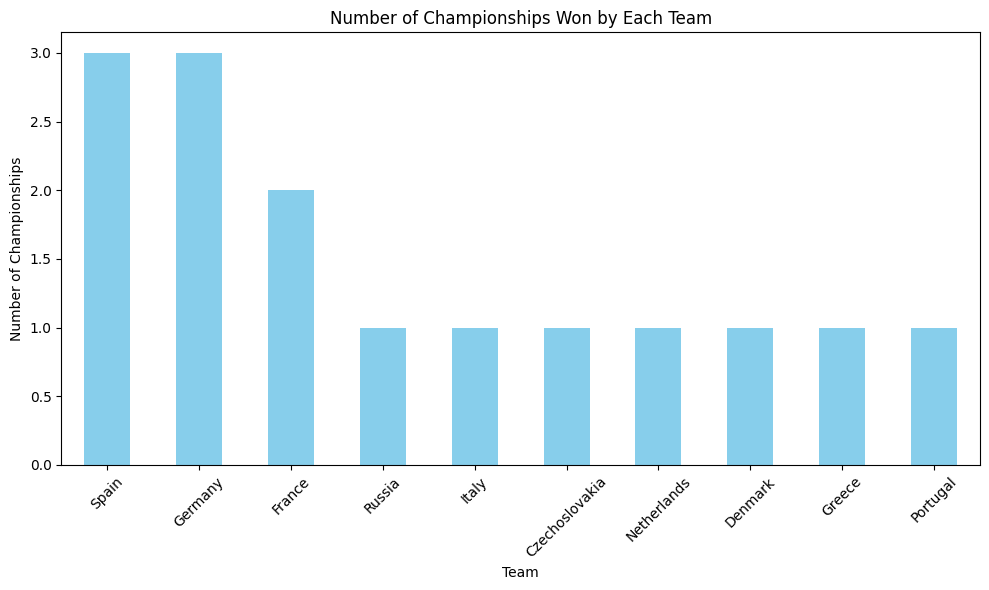

In [17]:
champion_counts = teams_stats['Champion'].value_counts()

plt.figure(figsize=(10, 6))
champion_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Championships Won by Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Championships')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Most attended City per tournament

In [18]:
top_attendance=matches[['City','Attendance','Year']].groupby(['Year']).max()
top_attendance=top_attendance.reset_index()
plt.figure(figsize=(20,10))
fig = go.Figure(data=[go.Bar(
            x=top_attendance['Year'], y=top_attendance['Attendance'],
            text=top_attendance['City'],
            textposition='outside',
        )])
fig.update_layout(title='Most Attendance in the tournament',
                   xaxis_title='Year',
                   yaxis_title='Attendance')
fig.show()

<Figure size 2000x1000 with 0 Axes>

Average player age

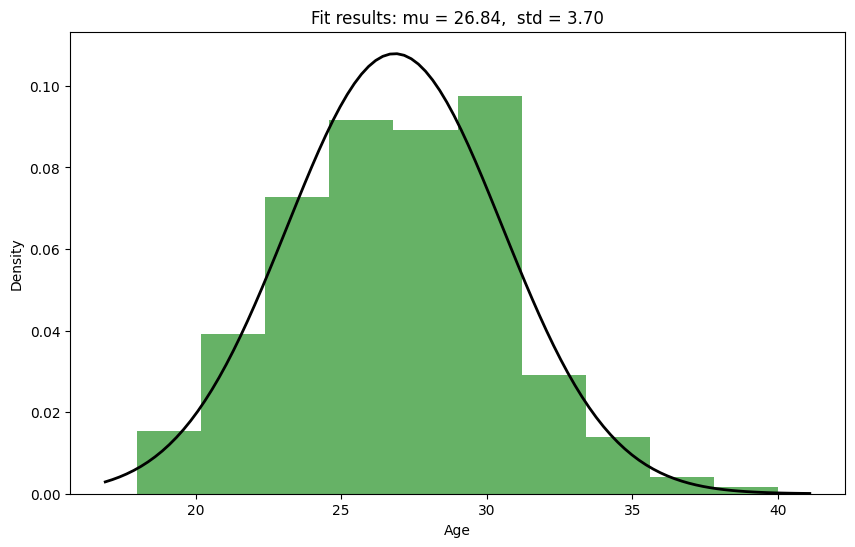

In [19]:
players['Age'] = players['DateofBirth(age)'].str.extract(r'aged (\d+)').astype(float)
players = players.dropna(subset=['Age'])
mean_age = players['Age'].mean()
std_age = players['Age'].std()

plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(players['Age'], bins=10, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
bell_curve = (1/(std_age * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean_age) / std_age) ** 2)
plt.plot(x, bell_curve, 'k', linewidth=2)

title = f"Fit results: mu = {mean_age:.2f},  std = {std_age:.2f}"
plt.title(title)
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

Player of the Tournament / Top Scorer until 1992

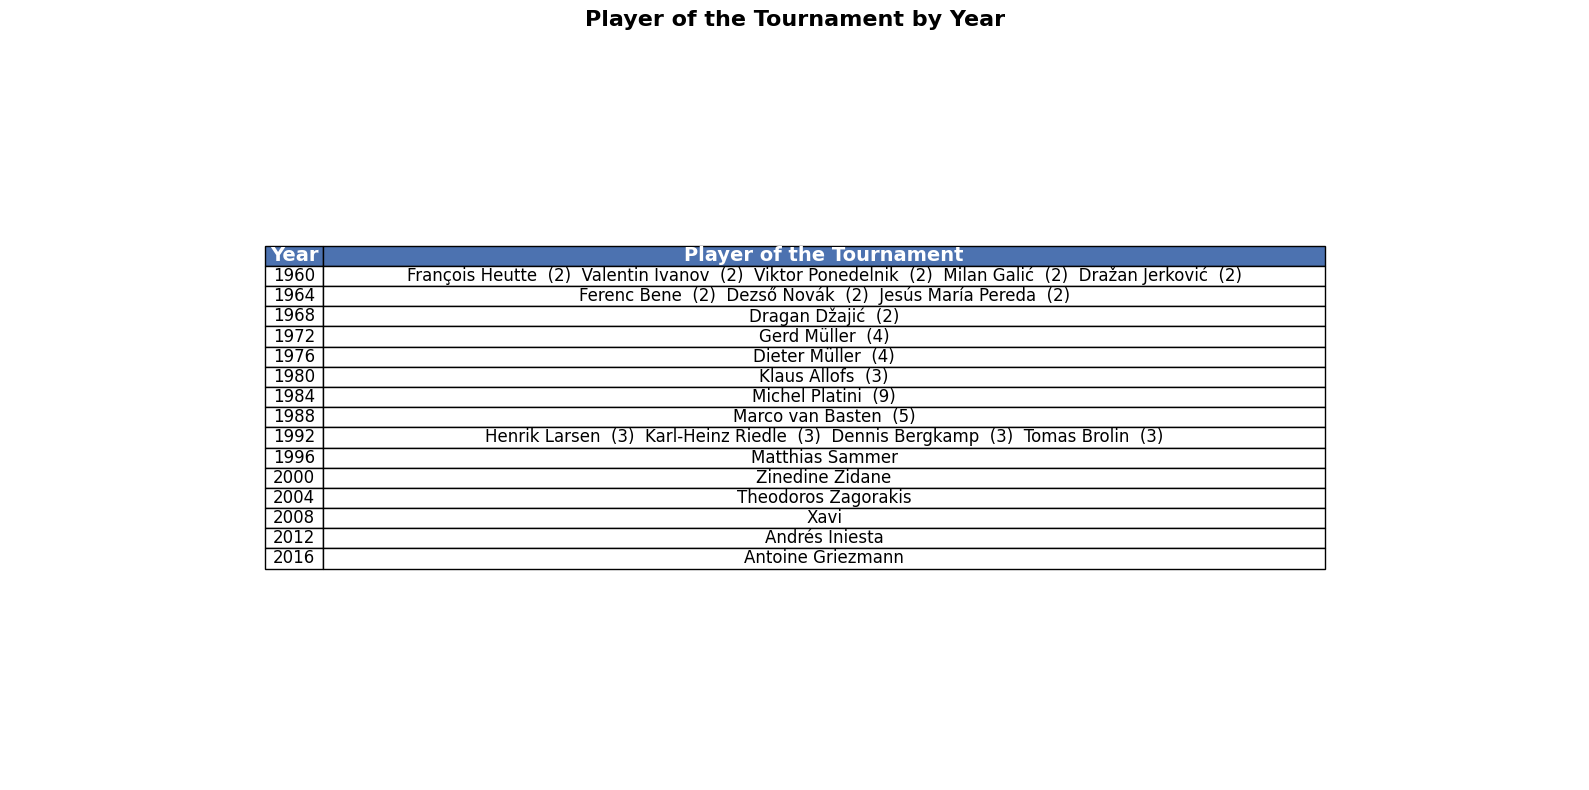

In [20]:
teams_stats['Player of the Tournament'] = teams_stats['Player of the Tournament'].fillna(teams_stats['Top scorer(s)'])
player_of_the_tournament = teams_stats[['Year', 'Player of the Tournament']]
fig, ax = plt.subplots(figsize=(16, 8))  # Increase the size of the figure
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

table = ax.table(cellText=player_of_the_tournament.values, colLabels=player_of_the_tournament.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(player_of_the_tournament.columns))))
colors = plt.cm.BuPu(mcolors.Normalize(vmin=0, vmax=1)(range(len(player_of_the_tournament) + 1)))
for i, key in enumerate(table.get_celld().keys()):
    cell = table.get_celld()[key]
    if key[0] == 0:  
        cell.set_fontsize(14)
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#4c72b0')
    else: 
        cell.set_facecolor('white')
        cell.set_edgecolor('black')
plt.title('Player of the Tournament by Year', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()